# Librería

In [1]:
# Tratamiento de datos
import pandas as pd
import numpy as np
# Visualización
import matplotlib.pyplot as plt
import seaborn as sns
# Modelos
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import  RandomForestClassifier, VotingClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, precision_score, recall_score, \
roc_curve, roc_auc_score, ConfusionMatrixDisplay, multilabel_confusion_matrix

import warnings
warnings.filterwarnings('ignore')

# Data

In [2]:
URL = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
titanic = pd.read_csv(URL, index_col='PassengerId')

# Primera Exploración

In [3]:
df = titanic.copy()

In [4]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.tail()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
df.shape

(891, 11)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


- Age - Cabin - Embarked posee nulos
- Tenemos 5 columnas de tipo object -> Tratar para ver si podemos pasar y utilizar en nuestros modelos.

In [8]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


- Survived es binaria
- SibSp posee un max de 8?
- Parch posee un max de 6?
- Age 0.420000 en min?
- Fare el boleto màs caro es de 512

In [9]:
df.describe(include='object')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


- Name no es importante para saber si sobrevivió o no y cumple con el requisito que son todos unicos.
- Ticket - Cabin -> demasiados únicos

<Axes: >

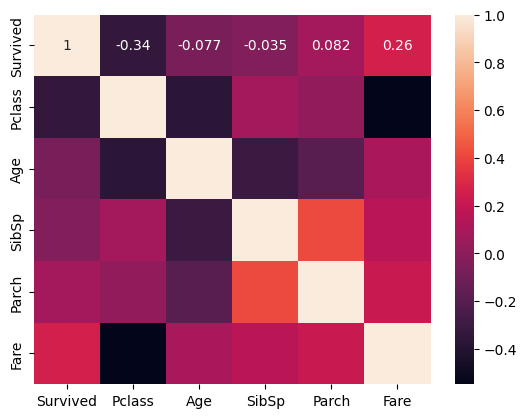

In [12]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

# Mini EDA

In [11]:
from clases import CategoricalReport, NumericReport


 ************************************************************************************************************** 

Variable : NAME

+---------------------------------------------------+---------------------------+
|                   Valores Únicos                  | Frecuencia de Mayor Valor |
+---------------------------------------------------+---------------------------+
|              Braund, Mr. Owen Harris              |             1             |
|           Saundercock, Mr. William Henry          |             1             |
|            Andersson, Mr. Anders Johan            |             1             |
|               Heikkinen, Miss. Laina              |             1             |
|    Futrelle, Mrs. Jacques Heath (Lily May Peel)   |             1             |
|              Allen, Mr. William Henry             |             1             |
|                  Moran, Mr. James                 |             1             |
|              McCarthy, Mr. Timothy J          

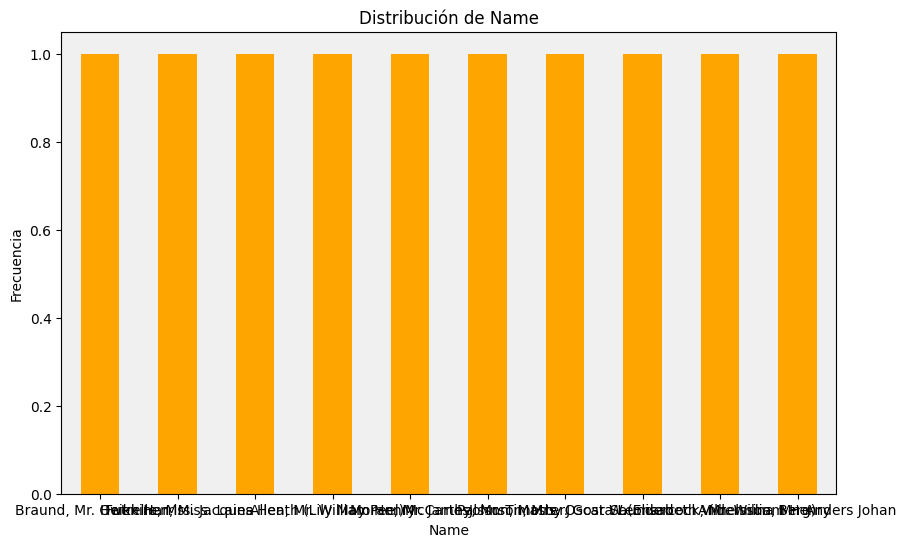


 ************************************************************************************************************** 

Variable : SEX

+----------------+---------------------------+
| Valores Únicos | Frecuencia de Mayor Valor |
+----------------+---------------------------+
|      male      |            577            |
|     female     |            314            |
+----------------+---------------------------+

Nulos: 0 (0.00%) sobre el total: 891 rows

+------+-----------------------+
| Moda | Frecuencia de la moda |
+------+-----------------------+
| male |           1           |
+------+-----------------------+


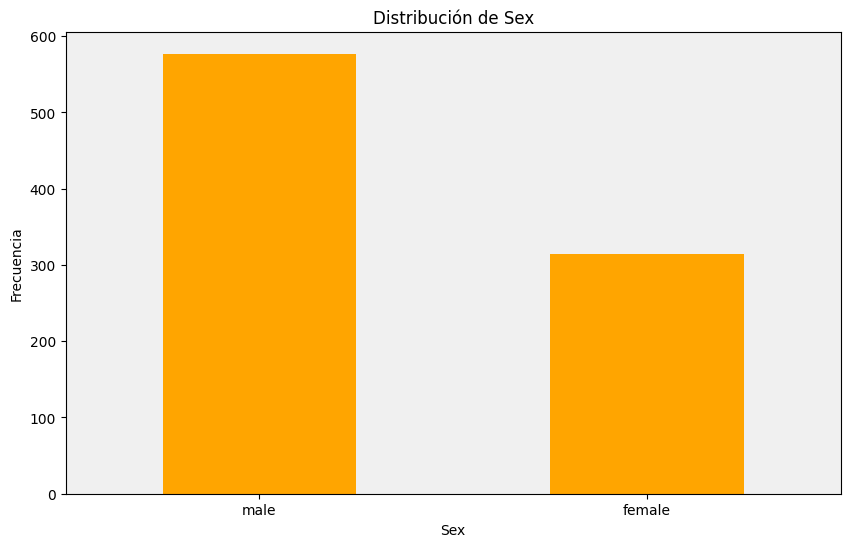


 ************************************************************************************************************** 

Variable : TICKET

+----------------+---------------------------+
| Valores Únicos | Frecuencia de Mayor Valor |
+----------------+---------------------------+
|     347082     |             7             |
|      1601      |             7             |
|    CA. 2343    |             7             |
|    3101295     |             6             |
|    CA 2144     |             6             |
|     347088     |             6             |
|  S.O.C. 14879  |             5             |
|     382652     |             5             |
|      4133      |             4             |
|     347077     |             4             |
+----------------+---------------------------+

Nulos: 0 (0.00%) sobre el total: 891 rows

+------+-----------------------+
| Moda | Frecuencia de la moda |
+------+-----------------------+
| 1601 |           3           |
+------+-----------------------+

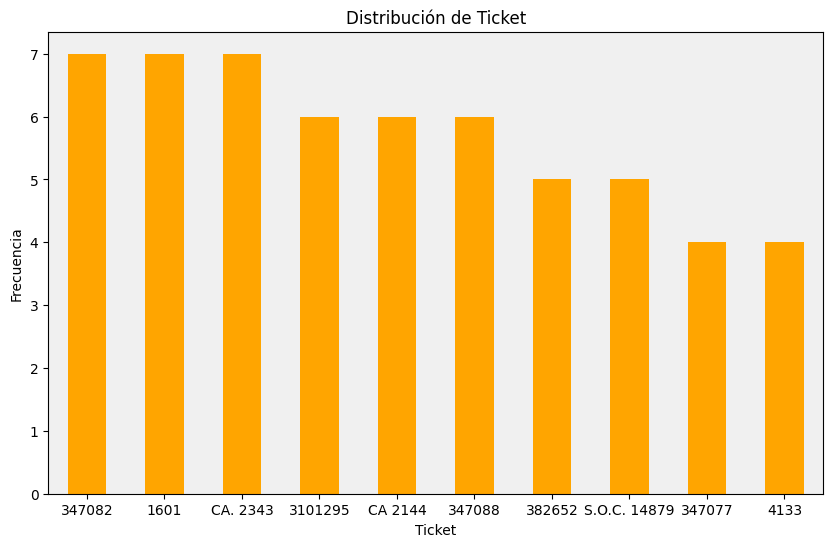


 ************************************************************************************************************** 

Variable : CABIN

+----------------+---------------------------+
| Valores Únicos | Frecuencia de Mayor Valor |
+----------------+---------------------------+
|    B96 B98     |             4             |
|  C23 C25 C27   |             4             |
|       G6       |             4             |
|    C22 C26     |             3             |
|      F33       |             3             |
|       F2       |             3             |
|      E101      |             3             |
|       D        |             3             |
|      D26       |             2             |
|       F4       |             2             |
+----------------+---------------------------+

Nulos: 687 (77.10%) sobre el total: 891 rows

+---------+-----------------------+
|   Moda  | Frecuencia de la moda |
+---------+-----------------------+
| B96 B98 |           3           |
+---------+-------

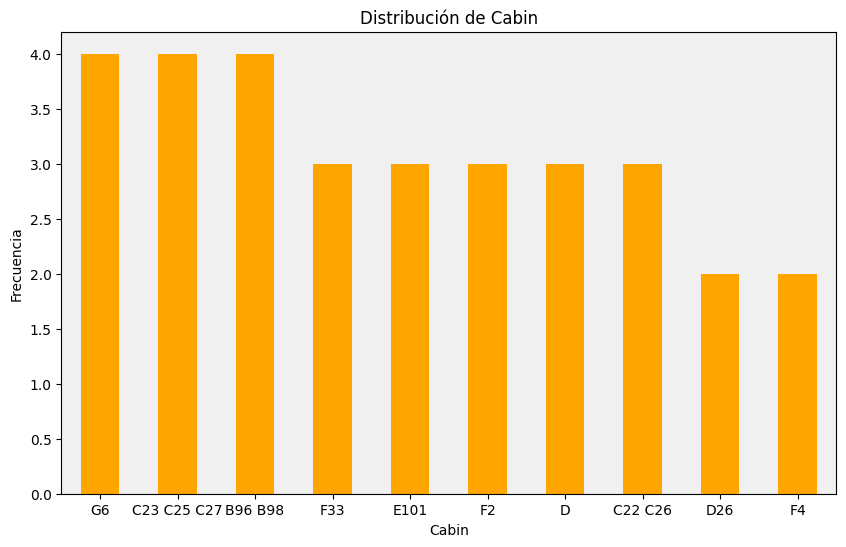


 ************************************************************************************************************** 

Variable : EMBARKED

+----------------+---------------------------+
| Valores Únicos | Frecuencia de Mayor Valor |
+----------------+---------------------------+
|       S        |            644            |
|       C        |            168            |
|       Q        |             77            |
+----------------+---------------------------+

Nulos: 2 (0.22%) sobre el total: 891 rows

+------+-----------------------+
| Moda | Frecuencia de la moda |
+------+-----------------------+
|  S   |           1           |
+------+-----------------------+


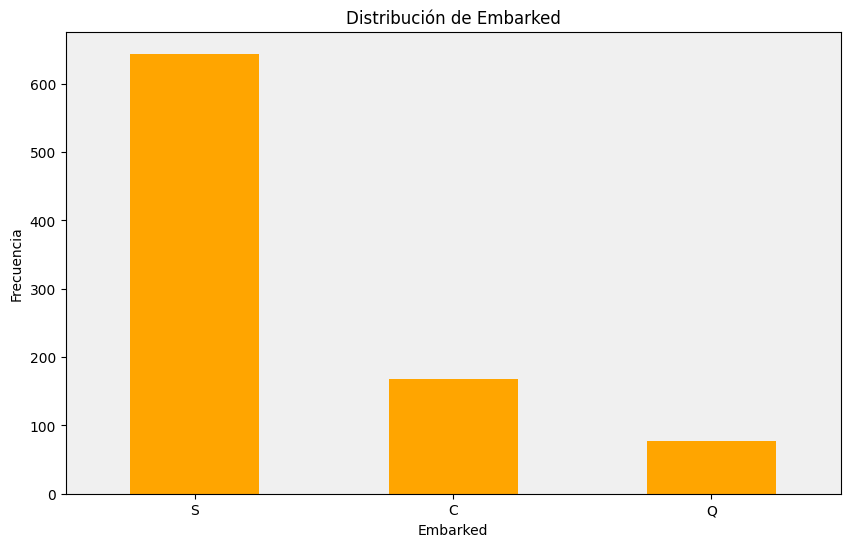

In [12]:
# Crear una instancia de la clase
categorical_reporter = CategoricalReport(df)

# Generar informe para la columna 'Category'
categorical_reporter.generate_report('Name', color= "orange")
categorical_reporter.generate_report('Sex', color="orange")
categorical_reporter.generate_report('Ticket', color="orange")
categorical_reporter.generate_report('Cabin', color="orange")
categorical_reporter.generate_report('Embarked', color="orange")


 ************************************************************************************************************** 

Variable : SURVIVED

+----------------+------------+
| Valores Únicos | Frecuencia |
+----------------+------------+
|       0        |    549     |
|       1        |    342     |
+----------------+------------+

Nulos: 0 (0.00%) sobre el total: 891 rows

+---------------------+-------+
|  Medidas Centrales  | Valor |
+---------------------+-------+
|        Media        |  0.38 |
|       Mediana       |  0.00 |
| Desviación Estándar |  0.49 |
+---------------------+-------+

+--------------------------+-------+
| Forma de la Distribución | Valor |
+--------------------------+-------+
|         Curtosis         | -1.78 |
|        Asimetría         |  0.48 |
+--------------------------+-------+

 ************************************************************************************************************** 



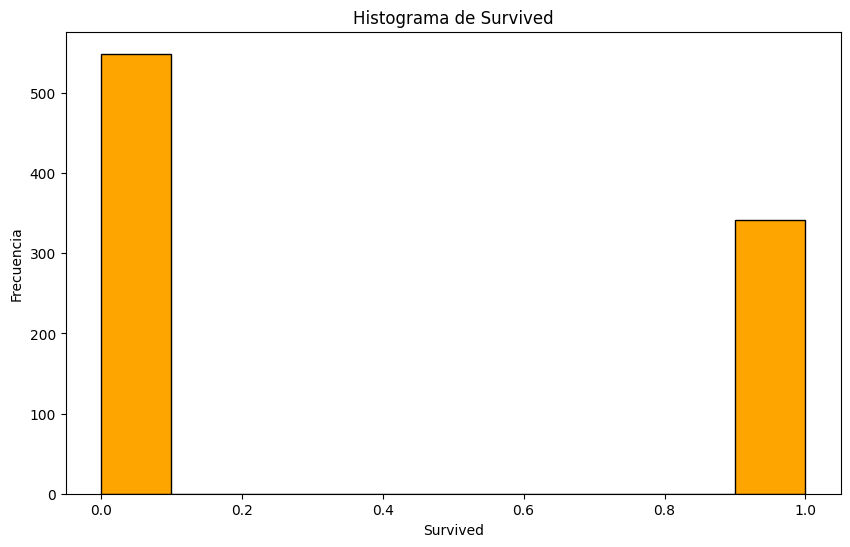


 ************************************************************************************************************** 

Variable : PCLASS

+----------------+------------+
| Valores Únicos | Frecuencia |
+----------------+------------+
|       3        |    491     |
|       1        |    216     |
|       2        |    184     |
+----------------+------------+

Nulos: 0 (0.00%) sobre el total: 891 rows

+---------------------+-------+
|  Medidas Centrales  | Valor |
+---------------------+-------+
|        Media        |  2.31 |
|       Mediana       |  3.00 |
| Desviación Estándar |  0.84 |
+---------------------+-------+

+--------------------------+-------+
| Forma de la Distribución | Valor |
+--------------------------+-------+
|         Curtosis         | -1.28 |
|        Asimetría         | -0.63 |
+--------------------------+-------+

 ************************************************************************************************************** 



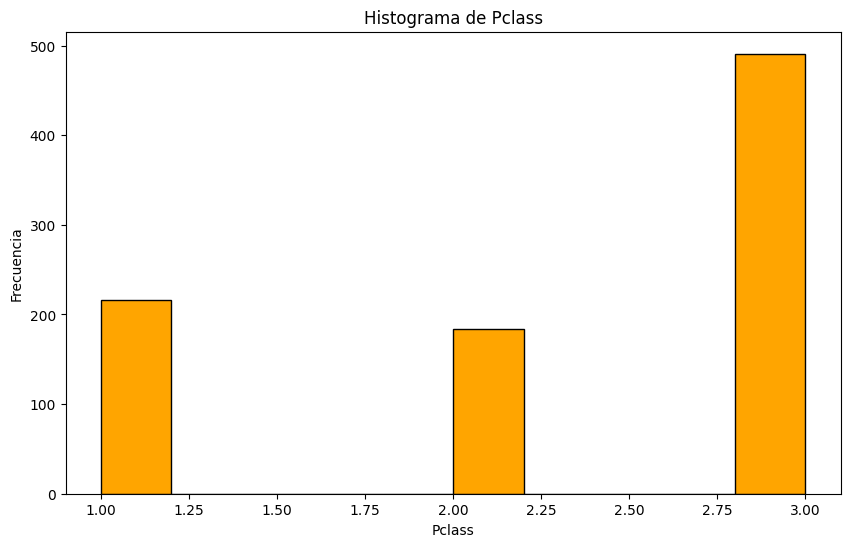


 ************************************************************************************************************** 

Variable : AGE

+----------------+------------+
| Valores Únicos | Frecuencia |
+----------------+------------+
|      24.0      |     30     |
|      22.0      |     27     |
|      18.0      |     26     |
|      28.0      |     25     |
|      19.0      |     25     |
|      30.0      |     25     |
|      21.0      |     24     |
|      25.0      |     23     |
|      36.0      |     22     |
|      29.0      |     20     |
+----------------+------------+

Nulos: 177 (19.87%) sobre el total: 891 rows

+---------------------+-------+
|  Medidas Centrales  | Valor |
+---------------------+-------+
|        Media        | 29.70 |
|       Mediana       | 28.00 |
| Desviación Estándar | 14.53 |
+---------------------+-------+

+--------------------------+-------+
| Forma de la Distribución | Valor |
+--------------------------+-------+
|         Curtosis         |  0.18 |
|

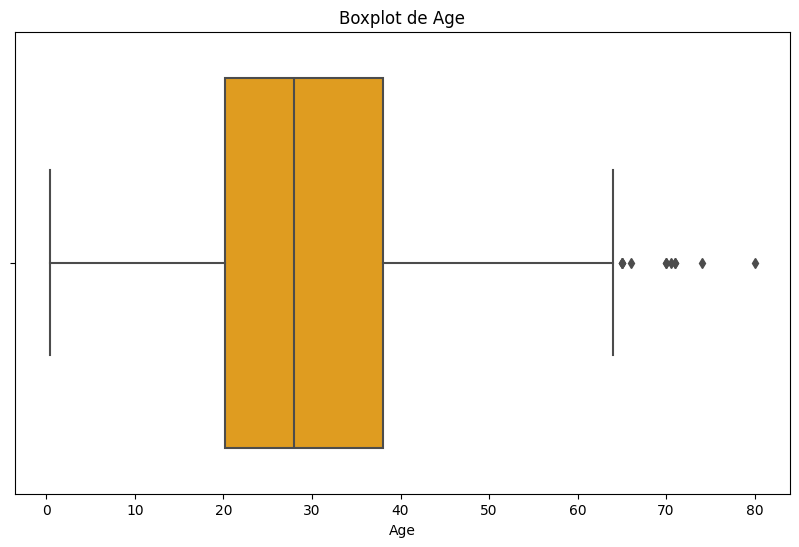


 ************************************************************************************************************** 

Variable : SIBSP

+----------------+------------+
| Valores Únicos | Frecuencia |
+----------------+------------+
|       0        |    608     |
|       1        |    209     |
|       2        |     28     |
|       4        |     18     |
|       3        |     16     |
|       8        |     7      |
|       5        |     5      |
+----------------+------------+

Nulos: 0 (0.00%) sobre el total: 891 rows

+---------------------+-------+
|  Medidas Centrales  | Valor |
+---------------------+-------+
|        Media        |  0.52 |
|       Mediana       |  0.00 |
| Desviación Estándar |  1.10 |
+---------------------+-------+

+--------------------------+-------+
| Forma de la Distribución | Valor |
+--------------------------+-------+
|         Curtosis         | 17.88 |
|        Asimetría         |  3.70 |
+--------------------------+-------+

 **********************

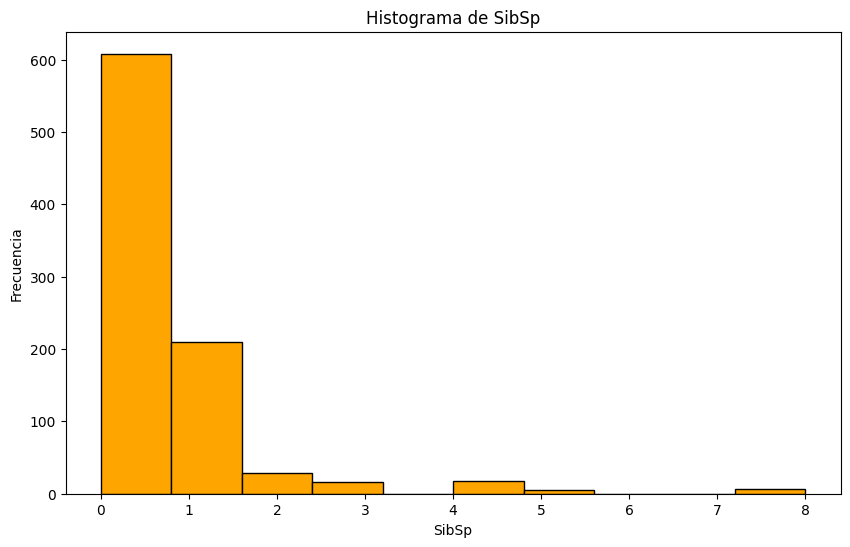


 ************************************************************************************************************** 

Variable : PARCH

+----------------+------------+
| Valores Únicos | Frecuencia |
+----------------+------------+
|       0        |    678     |
|       1        |    118     |
|       2        |     80     |
|       5        |     5      |
|       3        |     5      |
|       4        |     4      |
|       6        |     1      |
+----------------+------------+

Nulos: 0 (0.00%) sobre el total: 891 rows

+---------------------+-------+
|  Medidas Centrales  | Valor |
+---------------------+-------+
|        Media        |  0.38 |
|       Mediana       |  0.00 |
| Desviación Estándar |  0.81 |
+---------------------+-------+

+--------------------------+-------+
| Forma de la Distribución | Valor |
+--------------------------+-------+
|         Curtosis         |  9.78 |
|        Asimetría         |  2.75 |
+--------------------------+-------+

 **********************

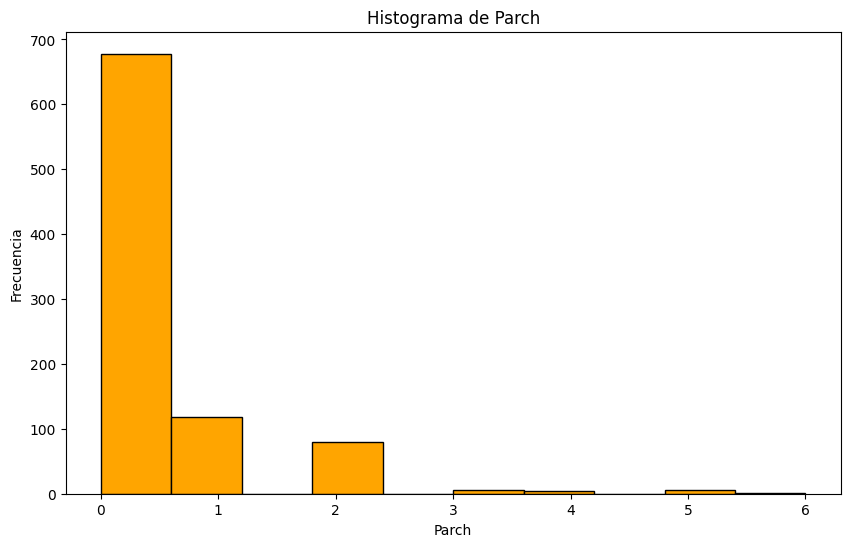


 ************************************************************************************************************** 

Variable : FARE

+----------------+------------+
| Valores Únicos | Frecuencia |
+----------------+------------+
|      8.05      |     43     |
|      13.0      |     42     |
|     7.8958     |     38     |
|      7.75      |     34     |
|      26.0      |     31     |
|      10.5      |     24     |
|     7.925      |     18     |
|     7.775      |     16     |
|     26.55      |     15     |
|     7.2292     |     15     |
+----------------+------------+

Nulos: 0 (0.00%) sobre el total: 891 rows

+---------------------+-------+
|  Medidas Centrales  | Valor |
+---------------------+-------+
|        Media        | 32.20 |
|       Mediana       | 14.45 |
| Desviación Estándar | 49.69 |
+---------------------+-------+

+--------------------------+-------+
| Forma de la Distribución | Valor |
+--------------------------+-------+
|         Curtosis         | 33.40 |
|  

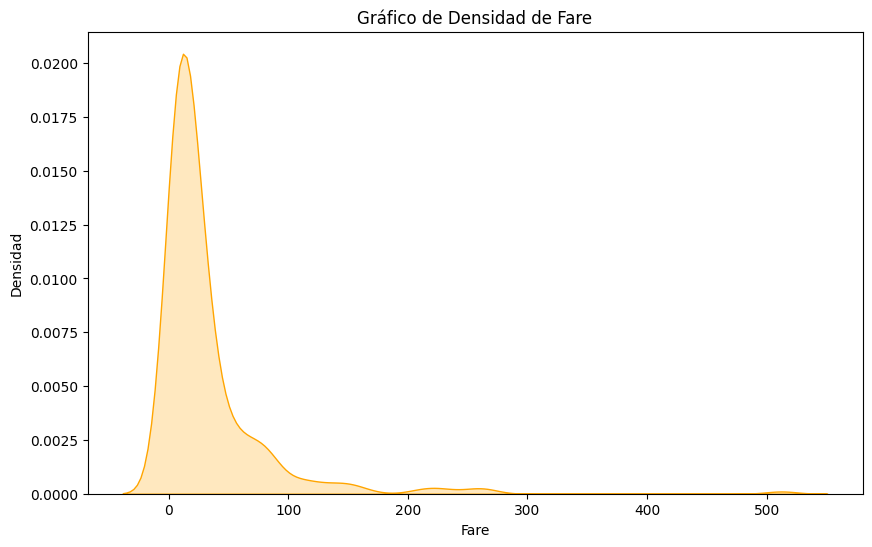

In [13]:
# Crear una instancia de la clase
numeric_reporter = NumericReport(df)

numeric_reporter.generate_report('Survived', 'histograma', color='orange')
numeric_reporter.generate_report('Pclass', 'histograma', color='orange')
numeric_reporter.generate_report('Age', 'boxplot', color='orange')
numeric_reporter.generate_report('SibSp', 'histograma', color='orange')
numeric_reporter.generate_report('Parch', 'histograma', color='orange')
numeric_reporter.generate_report('Fare', 'densidad', color='orange')

#### análisis bivariante

- Para un modelo de clasificación, generalmente se prefiere utilizar medidas de correlación que capturen relaciones monotónicas y no necesariamente lineales. En este caso, las correlaciones de rango, como la correlación de Spearman o Kendall, podrían ser más apropiadas que la correlación de Pearson, que asume una relación lineal.

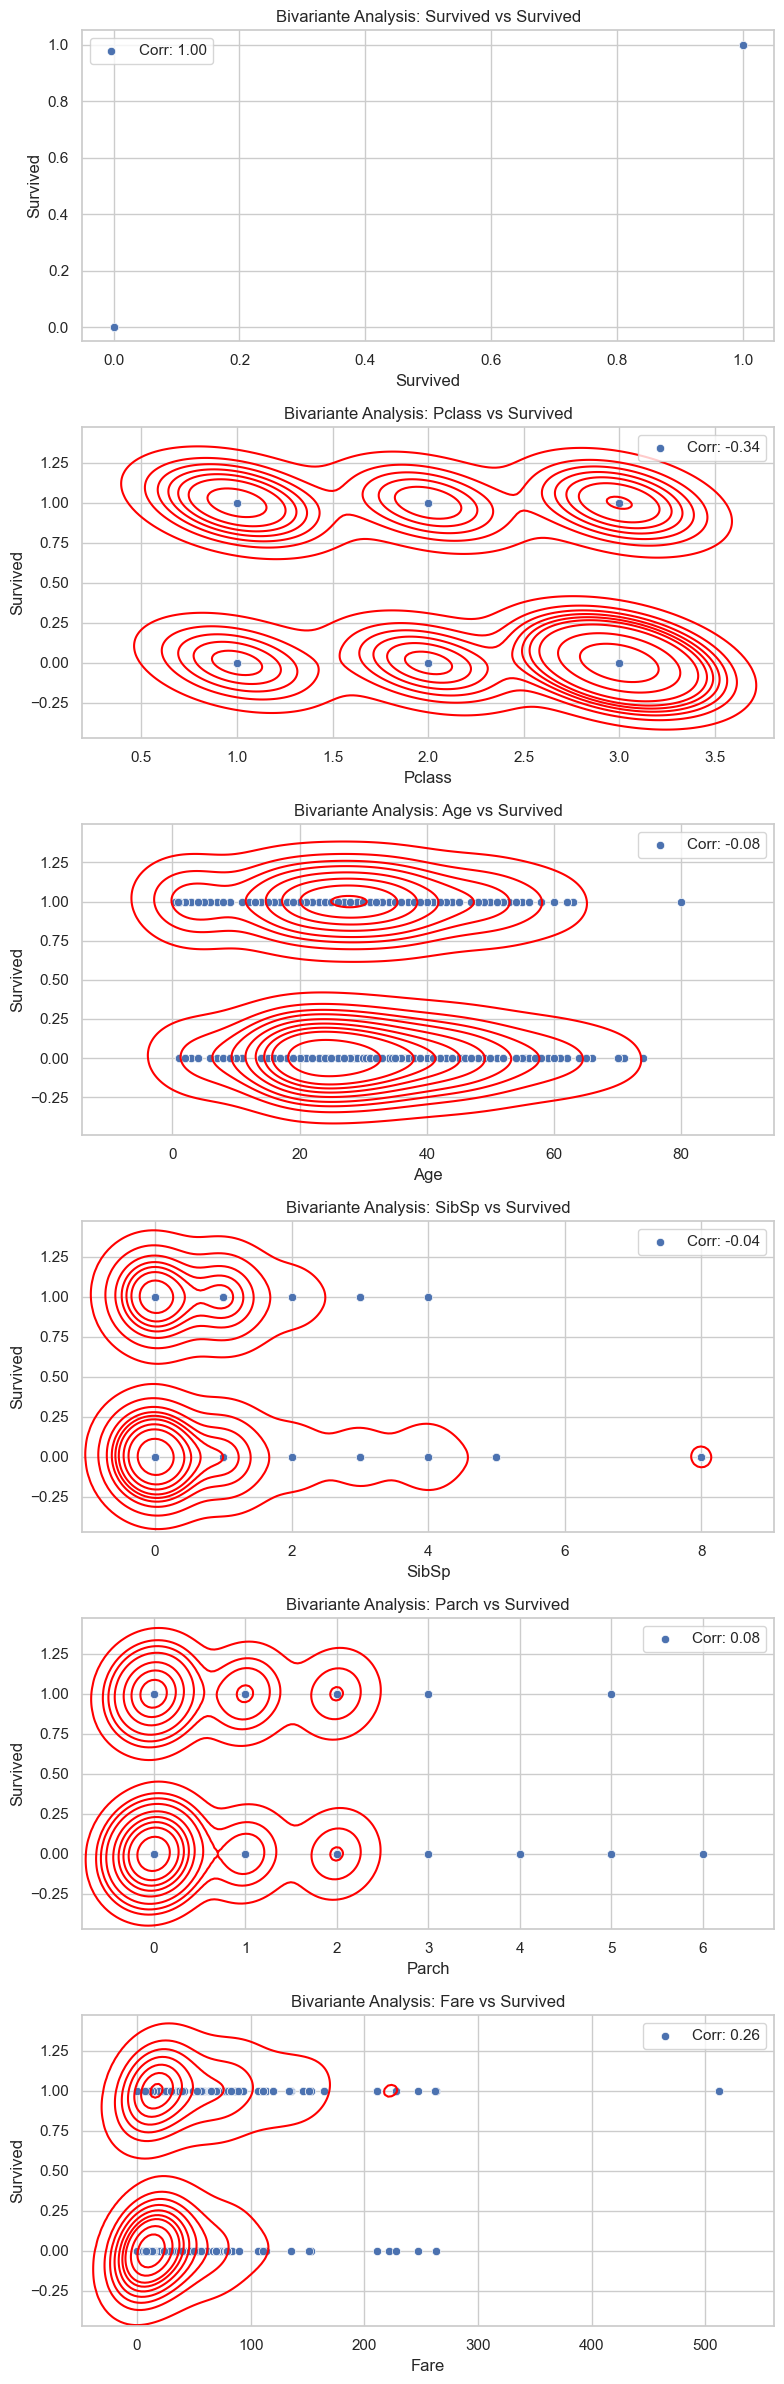

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

def bivariate_analysis(df, target_column, correlation_method='pearson'):
    """
    Genera un análisis bivariante de las columnas numéricas del DataFrame con respecto a la columna objetivo.

    Parameters:
        - df: DataFrame de pandas
        - target_column: Nombre de la columna objetivo
        - correlation_method: Método de correlación ('pearson', 'kendall', 'spearman')

    Returns:
        None (muestra los gráficos)
    """
    # Convertir valores infinitos a NaN
    df.replace([np.inf, -np.inf], np.nan, inplace=True)
    
    # Filtrar solo las columnas numéricas para el análisis bivariante
    numerical_columns = df.select_dtypes(include=['number']).columns
    
    # Configurar el estilo de seaborn para gráficos más atractivos
    sns.set(style="whitegrid")

    # Configurar el tamaño del gráfico en función del número de columnas numéricas
    num_plots = len(numerical_columns)
    fig, axes = plt.subplots(nrows=num_plots, ncols=1, figsize=(8, 4 * num_plots))

    # Iterar sobre las columnas numéricas y generar gráficos
    for i, column in enumerate(numerical_columns):
        # Scatterplot con línea de densidad
        sns.scatterplot(x=df[column], y=df[target_column], ax=axes[i])
        sns.kdeplot(x=df[column], y=df[target_column], fill=False, color='red', ax=axes[i])

        # Calcular la correlación
        if correlation_method == 'pearson':
            correlation_value = df[column].corr(df[target_column])
        elif correlation_method == 'kendall':
            correlation_value, _ = df[column].corr(df[target_column], method='kendall')
        elif correlation_method == 'spearman':
            correlation_value, _ = spearmanr(df[column], df[target_column])

        # Agregar la correlación a la leyenda
        axes[i].legend([f'Corr: {correlation_value:.2f}'])
        
        # Añadir títulos y etiquetas
        axes[i].set_title(f'Bivariante Analysis: {column} vs {target_column}')
        axes[i].set_xlabel(column)
        axes[i].set_ylabel(target_column)

    # Ajustar la disposición y mostrar el gráfico
    plt.tight_layout()
    plt.show()

# Ejemplo de uso
# Supongamos que 'df' es tu DataFrame y 'columna_objetivo' es el nombre de la columna que deseas analizar
bivariate_analysis(df, 'Survived', correlation_method='pearson')


# Tratamiento de missing y valores atípicos

In [13]:
df.drop(columns=['Cabin', 'Ticket'], inplace=True) # No tiene sentido rellenar la cabina y el ticket

In [14]:
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True) # Lo llenamos con la métrica central MODA

In [15]:
import math
df_female = df[df['Sex'] == 'female'] # Según si era niña o mujer rellenamos con la media
df_male = df[df['Sex'] == 'male']

df_male['Age'].fillna(math.floor( df_male[df_male['Name'].str.contains('Master')]['Age'].mean() ), inplace=True)
df_male['Age'].fillna(math.floor( df_male[( (df_male['Name'].str.contains('Mr.')) & (df_male['Sex'] == 'male') )]['Age'].mean() ), inplace=True)

df_female['Age'].fillna(math.floor( df_female[df_female['Name'].str.contains('Miss')]['Age'].mean() ), inplace=True)
df_female['Age'].fillna(math.floor( df_female[( (df_female['Name'].str.contains('Mrs.'))  &  (df_female['Sex'] == 'female') )]['Age'].mean() ), inplace=True)

df = pd.concat((df_male, df_female))

In [16]:
df.duplicated().sum()

0

In [19]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

# Feature Engineer

In [17]:
# Creación de columnas
# Una idea (SibSp - Parch) si es mayor a 1, el pasajero fue acompañado. 
df['FamilySize'] = np.where(df['SibSp'] + df['Parch'] >= 1, 1, 0)
# Crear una columna adicional, adult@/niñ@
df['Persona'] = np.where(df['Age'] <= 14, 'niño/a', 'adulto/a')
df.head(3)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,Persona
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1,adulto/a
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,0,adulto/a
6,0,3,"Moran, Mr. James",male,4.0,0,0,8.4583,Q,0,niño/a


# División de Datos

In [18]:
mapeo = {'male': 0, 'female' : 1}
df['Sex'] = df['Sex'].map(mapeo)

mapeo = {'niño/a': 0, 'adulto/a' : 1}
df['Persona'] = df['Persona'].map(mapeo)

In [19]:
df.reset_index(inplace=True)

In [20]:
X_1 = df.drop(columns=['PassengerId', 'Name','SibSp','Parch', 'Age','Survived'])
y_1 = df['Survived']

x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, test_size=0.2, random_state=24)

In [21]:
X_2 = df.drop(columns=['PassengerId', 'Name','FamilySize','Persona', 'Survived'])
y_2 = df['Survived']

x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.2, random_state=24)

# Escalado + Dummies

In [22]:
OHE = OneHotEncoder(sparse=False, handle_unknown='ignore')
OHE.fit(x_train_2[['Embarked', 'Pclass']])
OHE.fit(x_test_2[['Embarked', 'Pclass']])

transformed_x_test_2 = OHE.transform(x_test_2[['Embarked', 'Pclass']])
transformed_x_train_2 = OHE.transform(x_train_2[['Embarked', 'Pclass']])

transformed_x_test_2 = pd.DataFrame(transformed_x_test_2, columns=OHE.get_feature_names_out(['Embarked', 'Pclass']), index=x_test_2.index)
transformed_x_train_2 = pd.DataFrame(transformed_x_train_2, columns=OHE.get_feature_names_out(['Embarked', 'Pclass']), index=x_train_2.index)

In [23]:
OHE = OneHotEncoder(sparse=False, handle_unknown='ignore')
OHE.fit(x_train_1[['Embarked', 'Pclass']])
OHE.fit(x_test_1[['Embarked', 'Pclass']])

transformed_x_test_1 = OHE.transform(x_test_1[['Embarked', 'Pclass']])
transformed_x_train_1 = OHE.transform(x_train_1[['Embarked', 'Pclass']])

transformed_x_test_1 = pd.DataFrame(transformed_x_test_1, columns=OHE.get_feature_names_out(['Embarked', 'Pclass']), index=x_test_1.index)
transformed_x_train_1 = pd.DataFrame(transformed_x_train_1, columns=OHE.get_feature_names_out(['Embarked', 'Pclass']), index=x_train_1.index)

In [24]:
x_train_1 = pd.concat((x_train_1, transformed_x_train_1), axis=1)
x_test_1 = pd.concat((x_test_1, transformed_x_test_1), axis=1)
x_train_2 = pd.concat((x_train_2, transformed_x_train_2), axis=1)
x_test_2 = pd.concat((x_test_2, transformed_x_test_2), axis=1)

In [25]:
x_train_1.drop(columns=['Embarked', 'Pclass'], inplace=True)
x_test_1.drop(columns=['Embarked', 'Pclass'], inplace=True)
x_train_2.drop(columns=['Embarked', 'Pclass'], inplace=True)
x_test_2.drop(columns=['Embarked', 'Pclass'], inplace=True)

In [26]:
x_train_1 # estandarizar Fare

,Sex,Fare,FamilySize,Persona,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
68,0,52.0000,0,1,0.0,0.0,1.0,1.0,0.0,0.0
768,1,10.5000,0,1,0.0,0.0,1.0,0.0,1.0,0.0
722,1,15.7417,1,0,1.0,0.0,0.0,0.0,0.0,1.0
94,0,13.0000,0,1,0.0,0.0,1.0,0.0,1.0,0.0
640,1,22.0250,1,0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
145,0,8.0500,0,1,0.0,0.0,1.0,0.0,0.0,1.0
401,0,0.0000,0,0,0.0,0.0,1.0,1.0,0.0,0.0
343,0,36.7500,1,0,0.0,0.0,1.0,0.0,1.0,0.0
192,0,30.5000,0,0,0.0,0.0,1.0,1.0,0.0,0.0


In [27]:
x_train_2 # Estandarizar Age - FaRE

,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
68,0,47.0,0,0,52.0000,0.0,0.0,1.0,1.0,0.0,0.0
768,1,34.0,0,0,10.5000,0.0,0.0,1.0,0.0,1.0,0.0
722,1,1.0,0,2,15.7417,1.0,0.0,0.0,0.0,0.0,1.0
94,0,42.0,0,0,13.0000,0.0,0.0,1.0,0.0,1.0,0.0
640,1,4.0,0,2,22.0250,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
145,0,51.0,0,0,8.0500,0.0,0.0,1.0,0.0,0.0,1.0
401,0,4.0,0,0,0.0000,0.0,0.0,1.0,1.0,0.0,0.0
343,0,8.0,1,1,36.7500,0.0,0.0,1.0,0.0,1.0,0.0
192,0,4.0,0,0,30.5000,0.0,0.0,1.0,1.0,0.0,0.0


In [32]:
# # Aplicando StandardScaler
scaler = MinMaxScaler()

list_sca = x_train_1[['Fare']]
X_train_scaled = scaler.fit_transform(list_sca)
x_train_1[['Fare']] = pd.DataFrame(X_train_scaled, columns = list_sca.columns, index =  x_train_1.index)

# ------------------------------------------

list_sca = x_train_2[['Fare', 'Age']]
X_train_scaled_2 = scaler.fit_transform(x_train_2)
df_train_2 = pd.DataFrame(X_train_scaled_2, columns = list_sca.columns)

x_train_2 = pd.concat((df_train_2, x_train_2))

# ------------------------------------
#TEST_X

X_train_scaled = scaler.transform(x_test_1)
df_test_1 = pd.DataFrame(X_train_scaled, columns = list_sca.columns)

x_test_1 = pd.concat((df_test_1, x_test_1))

X_train_scaled_2 = scaler.transform(x_test_2)
df_test_2 = pd.DataFrame(X_train_scaled_2, columns = list_sca.columns)

x_test_2 = pd.concat((df_test_2, x_test_1))

ValueError: Shape of passed values is (712, 10), indices imply (712, 1)

# Cross-Validation + Base-Lines

In [ ]:
voting_clf = VotingClassifier(
    estimators=[
        ('lr', LogisticRegression(random_state=24)),
        ('rf', RandomForestClassifier(random_state=24)),
        ('svc', SVC(random_state=24)),
        ("SVC_linear", SVC(kernel='linear')),
#     "SVC_poly": SVC(kernel='poly',degree=4),
    ]
)
voting_clf_2 = VotingClassifier(
    estimators=[
        ('lr', LogisticRegression(random_state=24)),
        ('rf', RandomForestClassifier(random_state=24)),
        ('svc', SVC(random_state=24)),
        ("SVC_linear", SVC(kernel='linear')),
#     "SVC_poly": SVC(kernel='poly',degree=4),
    ]
)

voting_clf.fit(x_train_1, y_train_1)
voting_clf_2.fit(x_train_2, y_train_2)

In [ ]:
for name, clf in voting_clf.named_estimators_.items():
    print(name, "=", clf.score(x_test_1, y_test_1))
    
for name, clf in voting_clf_2.named_estimators_.items():
    print(name, "=", clf.score(x_test_2, y_test_2))

In [ ]:
voting_clf.score(x_test_1, y_test_1)

In [ ]:
voting_clf.score(x_test_2, y_test_2)

In [29]:
# modelos = {
#     "Logistic Regression": LogisticRegression(),
#     "RandomForestClassifier" : RandomForestClassifier(n_estimators=100),
#     "SVC_linear": SVC(kernel='linear'),
#     "SVC_poly": SVC(kernel='poly',degree=4),
#     "SVC_rbf": SVC(),
# }

# # Define las métricas a usar
# metricas = ["accuracy", "f1_macro", "recall_macro", "precision_macro", "roc_auc_ovr"]

# resultados_dict = {}

# for nombre_modelo, modelo in modelos.items():
#     cv_resultados = cross_validate(modelo, x_train_1, y_train_1, cv=5, scoring=metricas)
    
#     for metrica in metricas:
#         clave = f"{nombre_modelo}_{metrica}"
#         resultados_dict[clave] = cv_resultados[f"test_{metrica}"].mean()

# # Convertir el diccionario de resultados en DataFrame
# resultados_df = pd.DataFrame([resultados_dict])

# resultados_dict_2 = {}

# for nombre_modelo, modelo in modelos.items():
#     cv_resultados = cross_validate(modelo, x_train_2, y_train_2, cv=5, scoring=metricas)
    
#     for metrica in metricas:
#         clave = f"{nombre_modelo}_{metrica}"
#         resultados_dict[clave] = cv_resultados[f"test_{metrica}"].mean()

# # Convertir el diccionario de resultados en DataFrame
# resultados_df_2 = pd.DataFrame([resultados_dict])


In [30]:
# resultados_df.T # El Random Forest por 3 puntos a logisticregression en accuracy

,0
Logistic Regression_accuracy,0.782311
Logistic Regression_f1_macro,0.770422
Logistic Regression_recall_macro,0.768384
Logistic Regression_precision_macro,0.776943
Logistic Regression_roc_auc_ovr,0.839383
RandomForestClassifier_accuracy,0.809002
RandomForestClassifier_f1_macro,0.798629
RandomForestClassifier_recall_macro,0.795265
RandomForestClassifier_precision_macro,0.805095
RandomForestClassifier_roc_auc_ovr,0.852878


In [31]:
# resultados_df_2.T # El Random Forest por 2 puntos a logisticregression en accuracy

,0
Logistic Regression_accuracy,0.783709
Logistic Regression_f1_macro,0.772235
Logistic Regression_recall_macro,0.771322
Logistic Regression_precision_macro,0.780273
Logistic Regression_roc_auc_ovr,0.842789
RandomForestClassifier_accuracy,0.793578
RandomForestClassifier_f1_macro,0.783745
RandomForestClassifier_recall_macro,0.782433
RandomForestClassifier_precision_macro,0.786889
RandomForestClassifier_roc_auc_ovr,0.839124


In [32]:
x_train_1.columns

Index(['Sex', 'Age', 'SibSp', 'Parch', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'Pclass_1', 'Pclass_2', 'Pclass_3'],
      dtype='object')

# Entrenar

In [37]:
rnd_clf = RandomForestClassifier(n_estimators=500, random_state=24)
rnd_clf.fit(x_train_1, y_train_1)
for score, name in zip(rnd_clf.feature_importances_, x_train_1.columns):
    print(round(score, 2), name)

0.32 Sex
0.44 Fare
0.04 FamilySize
0.05 Persona
0.01 Embarked_C
0.01 Embarked_Q
0.02 Embarked_S
0.03 Pclass_1
0.02 Pclass_2
0.06 Pclass_3


# Predicción

In [38]:
y_pred_bag = rnd_clf.predict(x_test_1)
y_pred_bag

array([0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0], dtype=int64)

# Validación del modelo

In [39]:
print(classification_report(y_test_1, y_pred_bag))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85       122
           1       0.68      0.68      0.68        57

    accuracy                           0.80       179
   macro avg       0.77      0.77      0.77       179
weighted avg       0.80      0.80      0.80       179



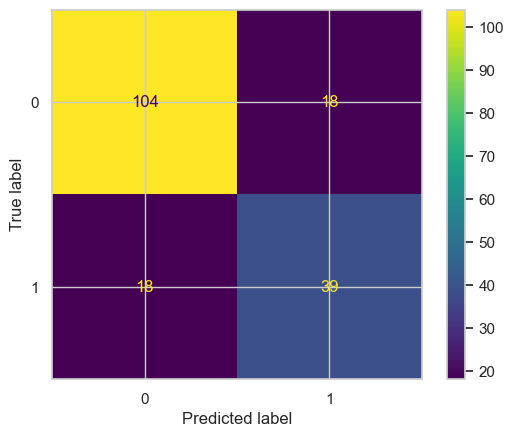

In [40]:
ConfusionMatrixDisplay(confusion_matrix(y_test_1, y_pred_bag)).plot()